In [14]:
# importing required libraries
import os 
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA

In [37]:
# Plot settings 
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style='whitegrid')
CSV_PATH = 'D:\data science\Assignments\Cardiotocographic.csv'#(csv file imported from path)

df = pd.read_csv(CSV_PATH)
print('Loaded dataframe with shape:', df.shape)

Loaded dataframe with shape: (2126, 14)


In [28]:
# for printing data set
print('\nColumns:')
print(df.columns.tolist())
print('\nFirst 5 rows:')
print(df.head())


Columns:
['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']

First 5 rows:
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [29]:
print('\nInfo:')
print(df.info())
# for checking  columns that may be strings but numeric
for col in df.columns:
    if df[col].dtype == object:
        # Try converting to numeric
        try:
            df[col] = pd.to_numeric(df[col].str.replace(',', '').str.strip())
            print(f"Converted column {col} to numeric.")
        except Exception:
            pass




Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None


In [30]:
# missing values
missing = df.isnull().sum().sort_values(ascending=False)
print('\nMissing values per column:')
print(missing[missing>0])


# Percentage missing
print('\nPercentage missing:')
print((df.isnull().mean()*100).round(2))

df_imputed = df.copy()
num_cols = df_imputed.select_dtypes(include=[np.number]).columns.tolist()

for c in num_cols:
    med = df_imputed[c].median()
    df_imputed[c] = df_imputed[c].fillna(med)




Missing values per column:
LB          21
DS          21
MLTV        21
Width       21
Tendency    21
DP          21
NSP         21
AC          20
dtype: int64

Percentage missing:
LB          0.99
AC          0.94
FM          0.00
UC          0.00
DL          0.00
DS          0.99
DP          0.99
ASTV        0.00
MSTV        0.00
ALTV        0.00
MLTV        0.99
Width       0.99
Tendency    0.99
NSP         0.99
dtype: float64


In [31]:
# Statistical summary
summary = df_imputed.describe().T
summary['median'] = df_imputed.median()
summary['IQR'] = df_imputed.quantile(0.75) - df_imputed.quantile(0.25)
summary = summary[['count','mean','median','std','min','25%','50%','75%','max','IQR']]
print('\nStatistical summary:')
print(summary)


# Additional metrics: skewness and kurtosis
skew_kurt = pd.DataFrame({
'skewness': df_imputed[num_cols].skew(),
'kurtosis': df_imputed[num_cols].kurtosis()
})
print('\nSkewness and kurtosis:')
print(skew_kurt)


Statistical summary:
           count        mean      median        std         min         25%  \
LB        2126.0  133.340204  133.000000  11.214379   51.842487  126.000000   
AC        2126.0    0.003204    0.001634   0.004373   -0.019284    0.000000   
FM        2126.0    0.009894    0.000000   0.067540   -0.480634    0.000000   
UC        2126.0    0.004391    0.004484   0.003340   -0.014925    0.001851   
DL        2126.0    0.001895    0.000000   0.003343   -0.015393    0.000000   
DS        2126.0    0.000002    0.000000   0.000141   -0.001353    0.000000   
DP        2126.0    0.000173    0.000000   0.000836   -0.005348    0.000000   
ASTV      2126.0   46.995984   49.000000  18.813973  -63.000000   32.000000   
MSTV      2126.0    1.364378    1.200000   1.173632   -6.600000    0.700000   
ALTV      2126.0   10.285964    0.000000  21.205041  -91.000000    0.000000   
MLTV      2126.0    8.276147    7.400000   7.734851  -50.700000    4.600000   
Width     2126.0   70.395387  

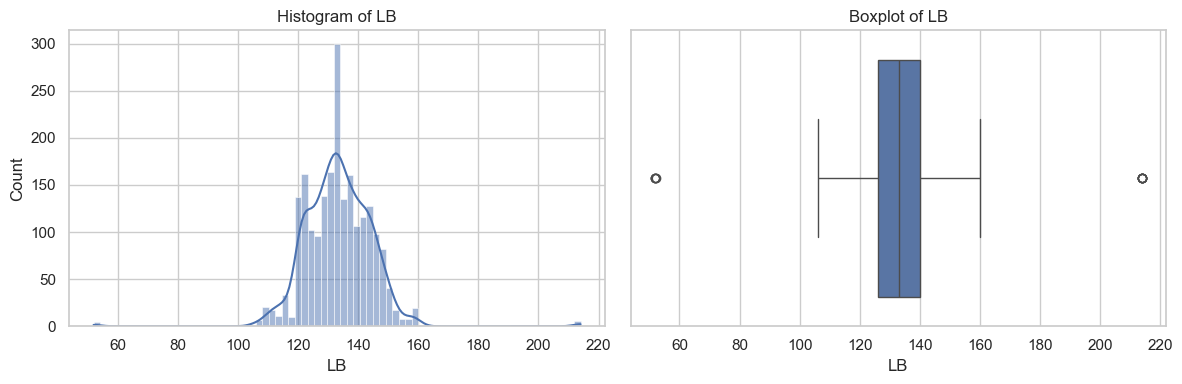

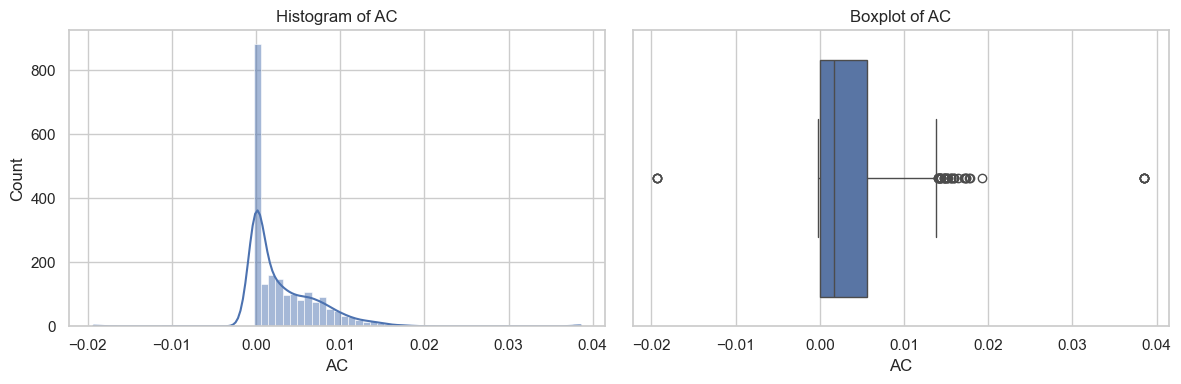

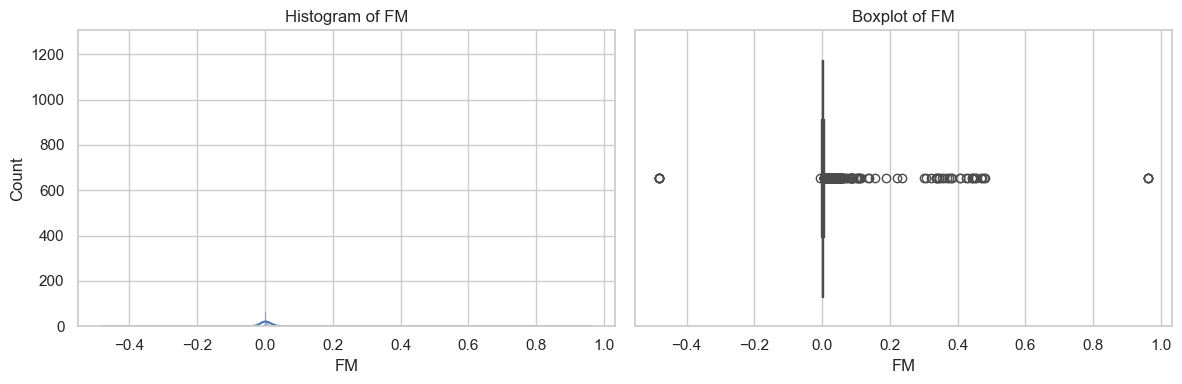

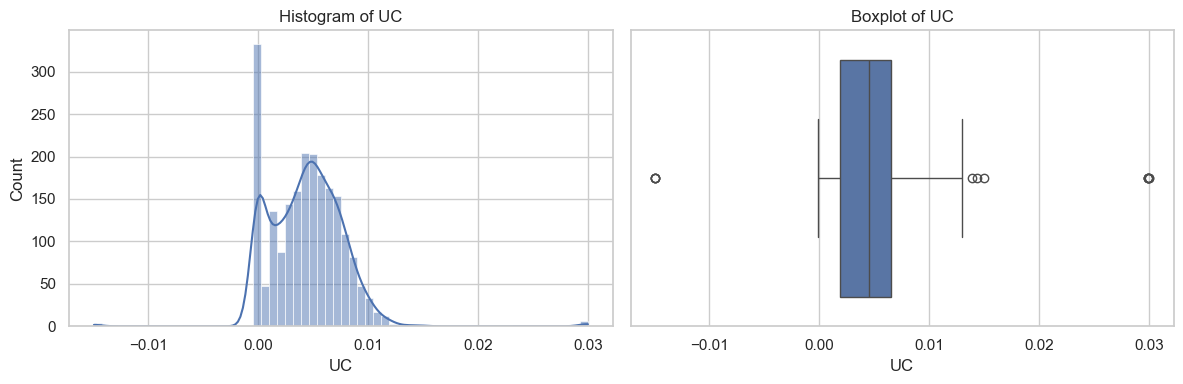

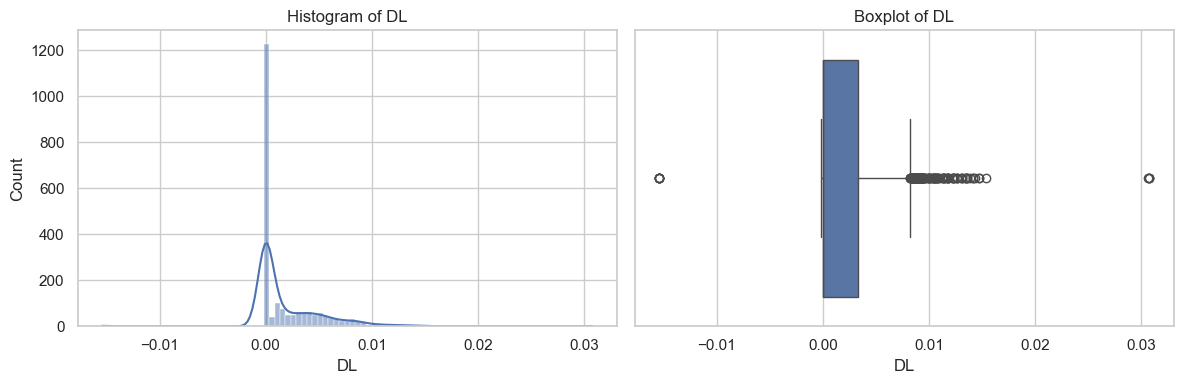

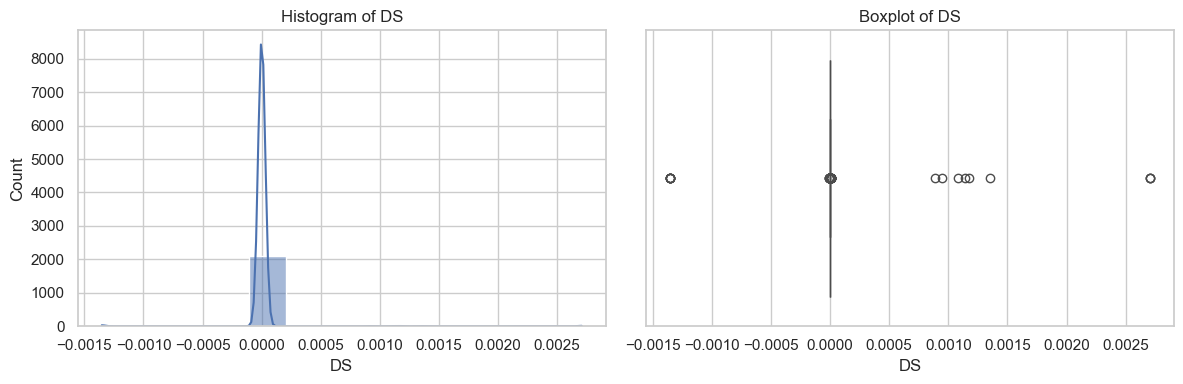

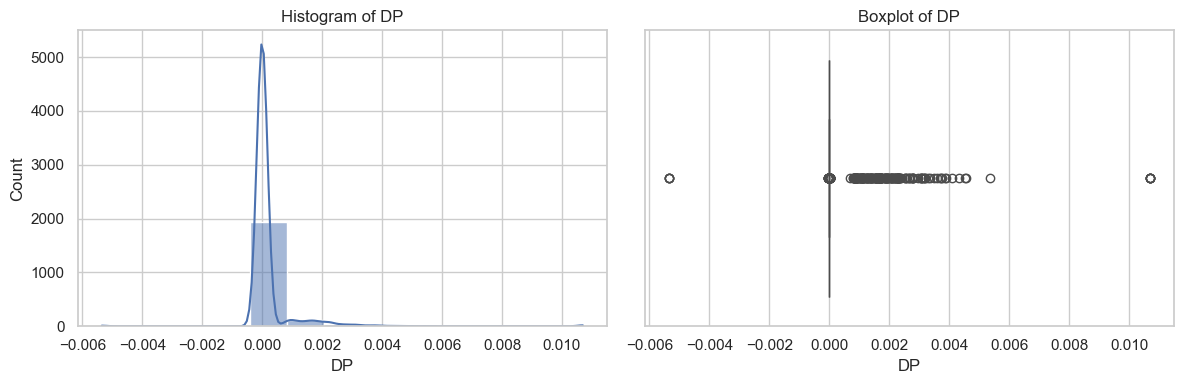

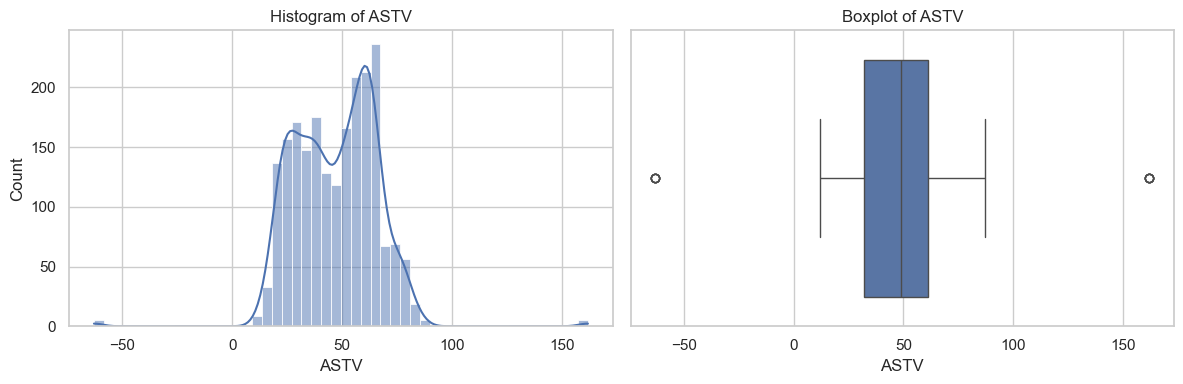

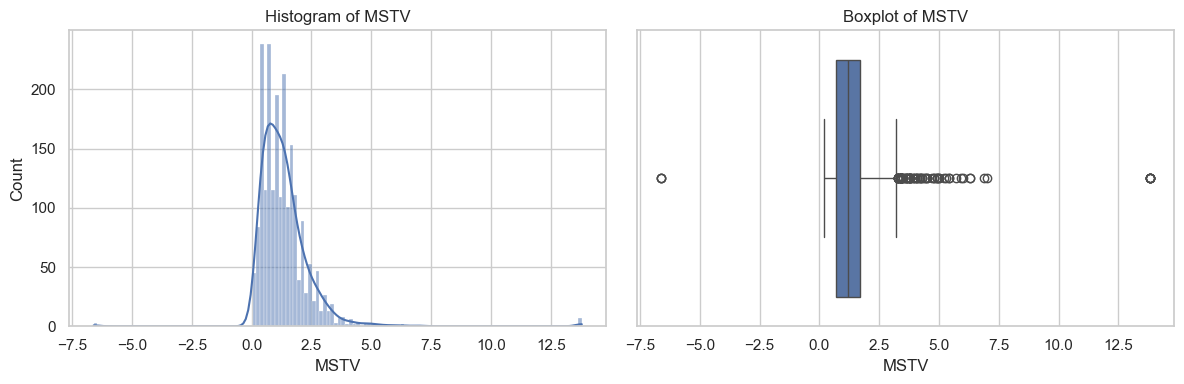

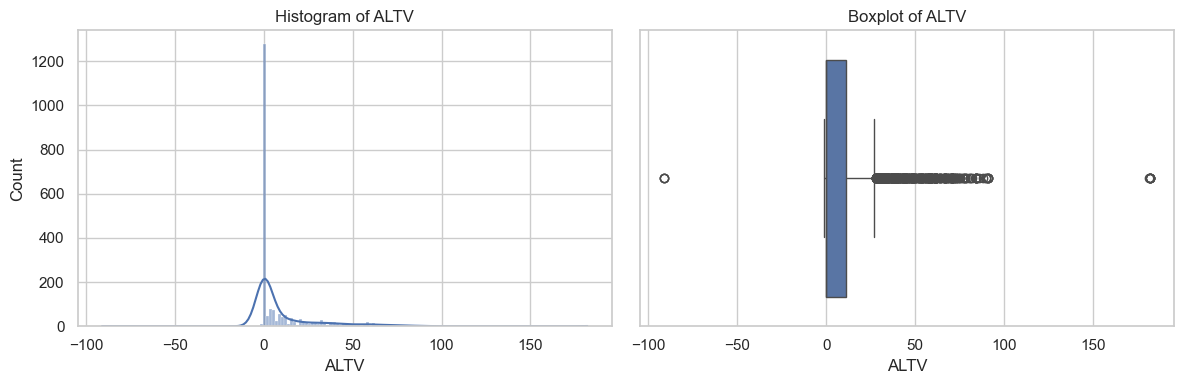

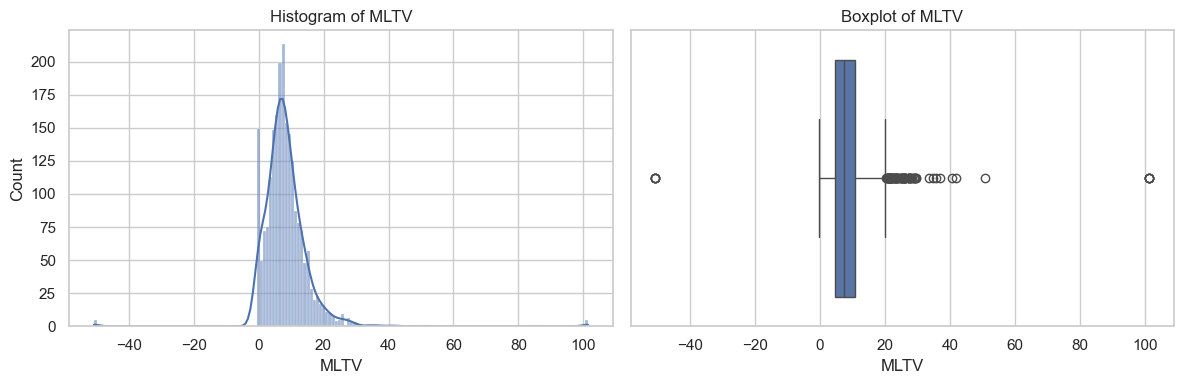

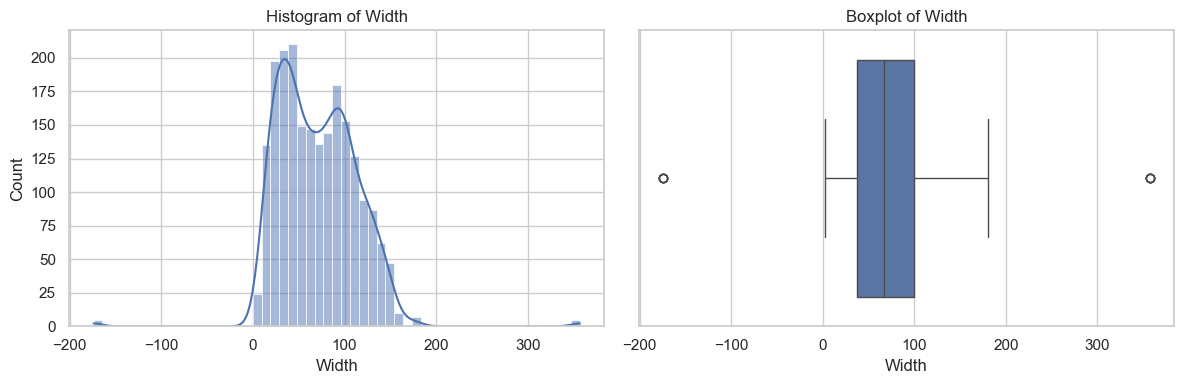

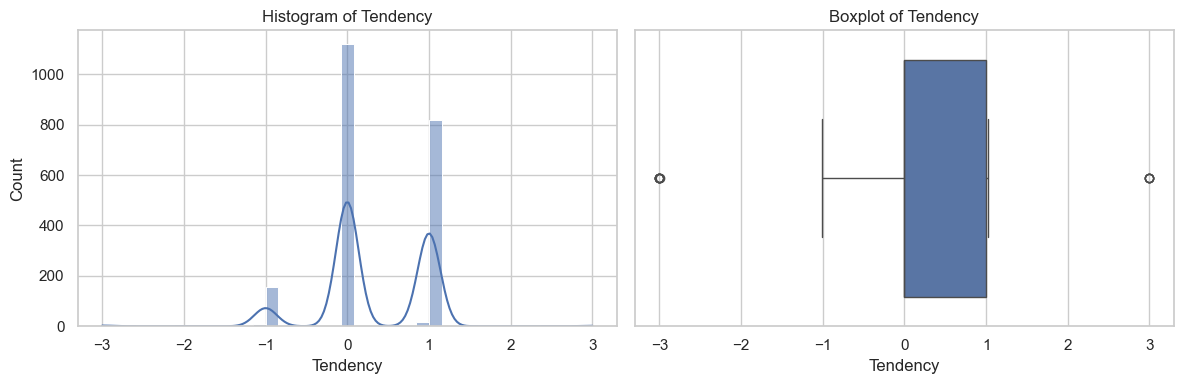

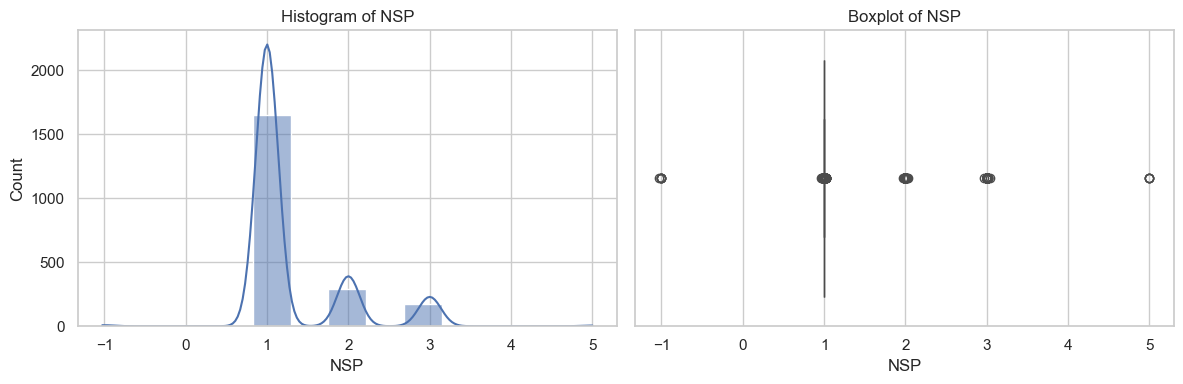

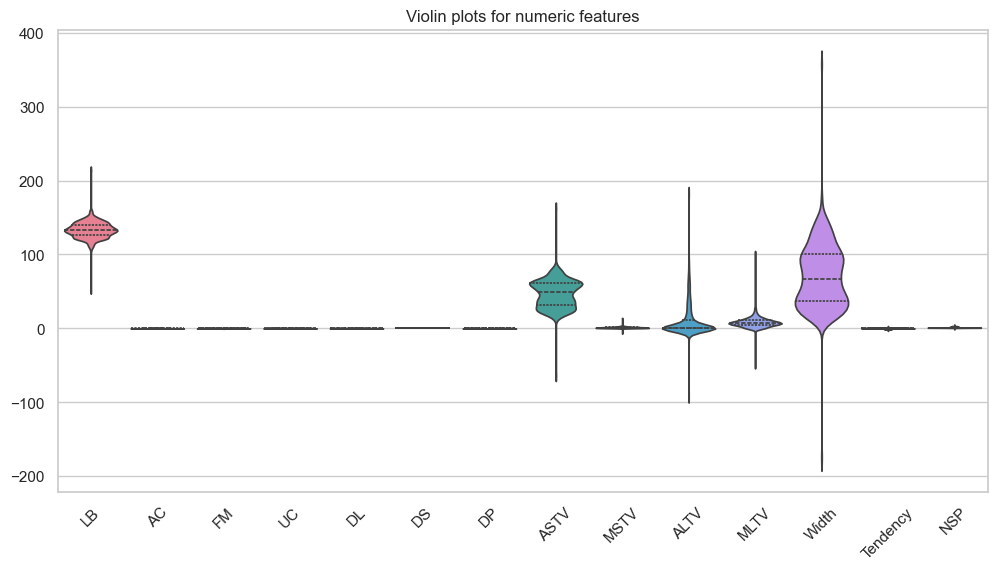

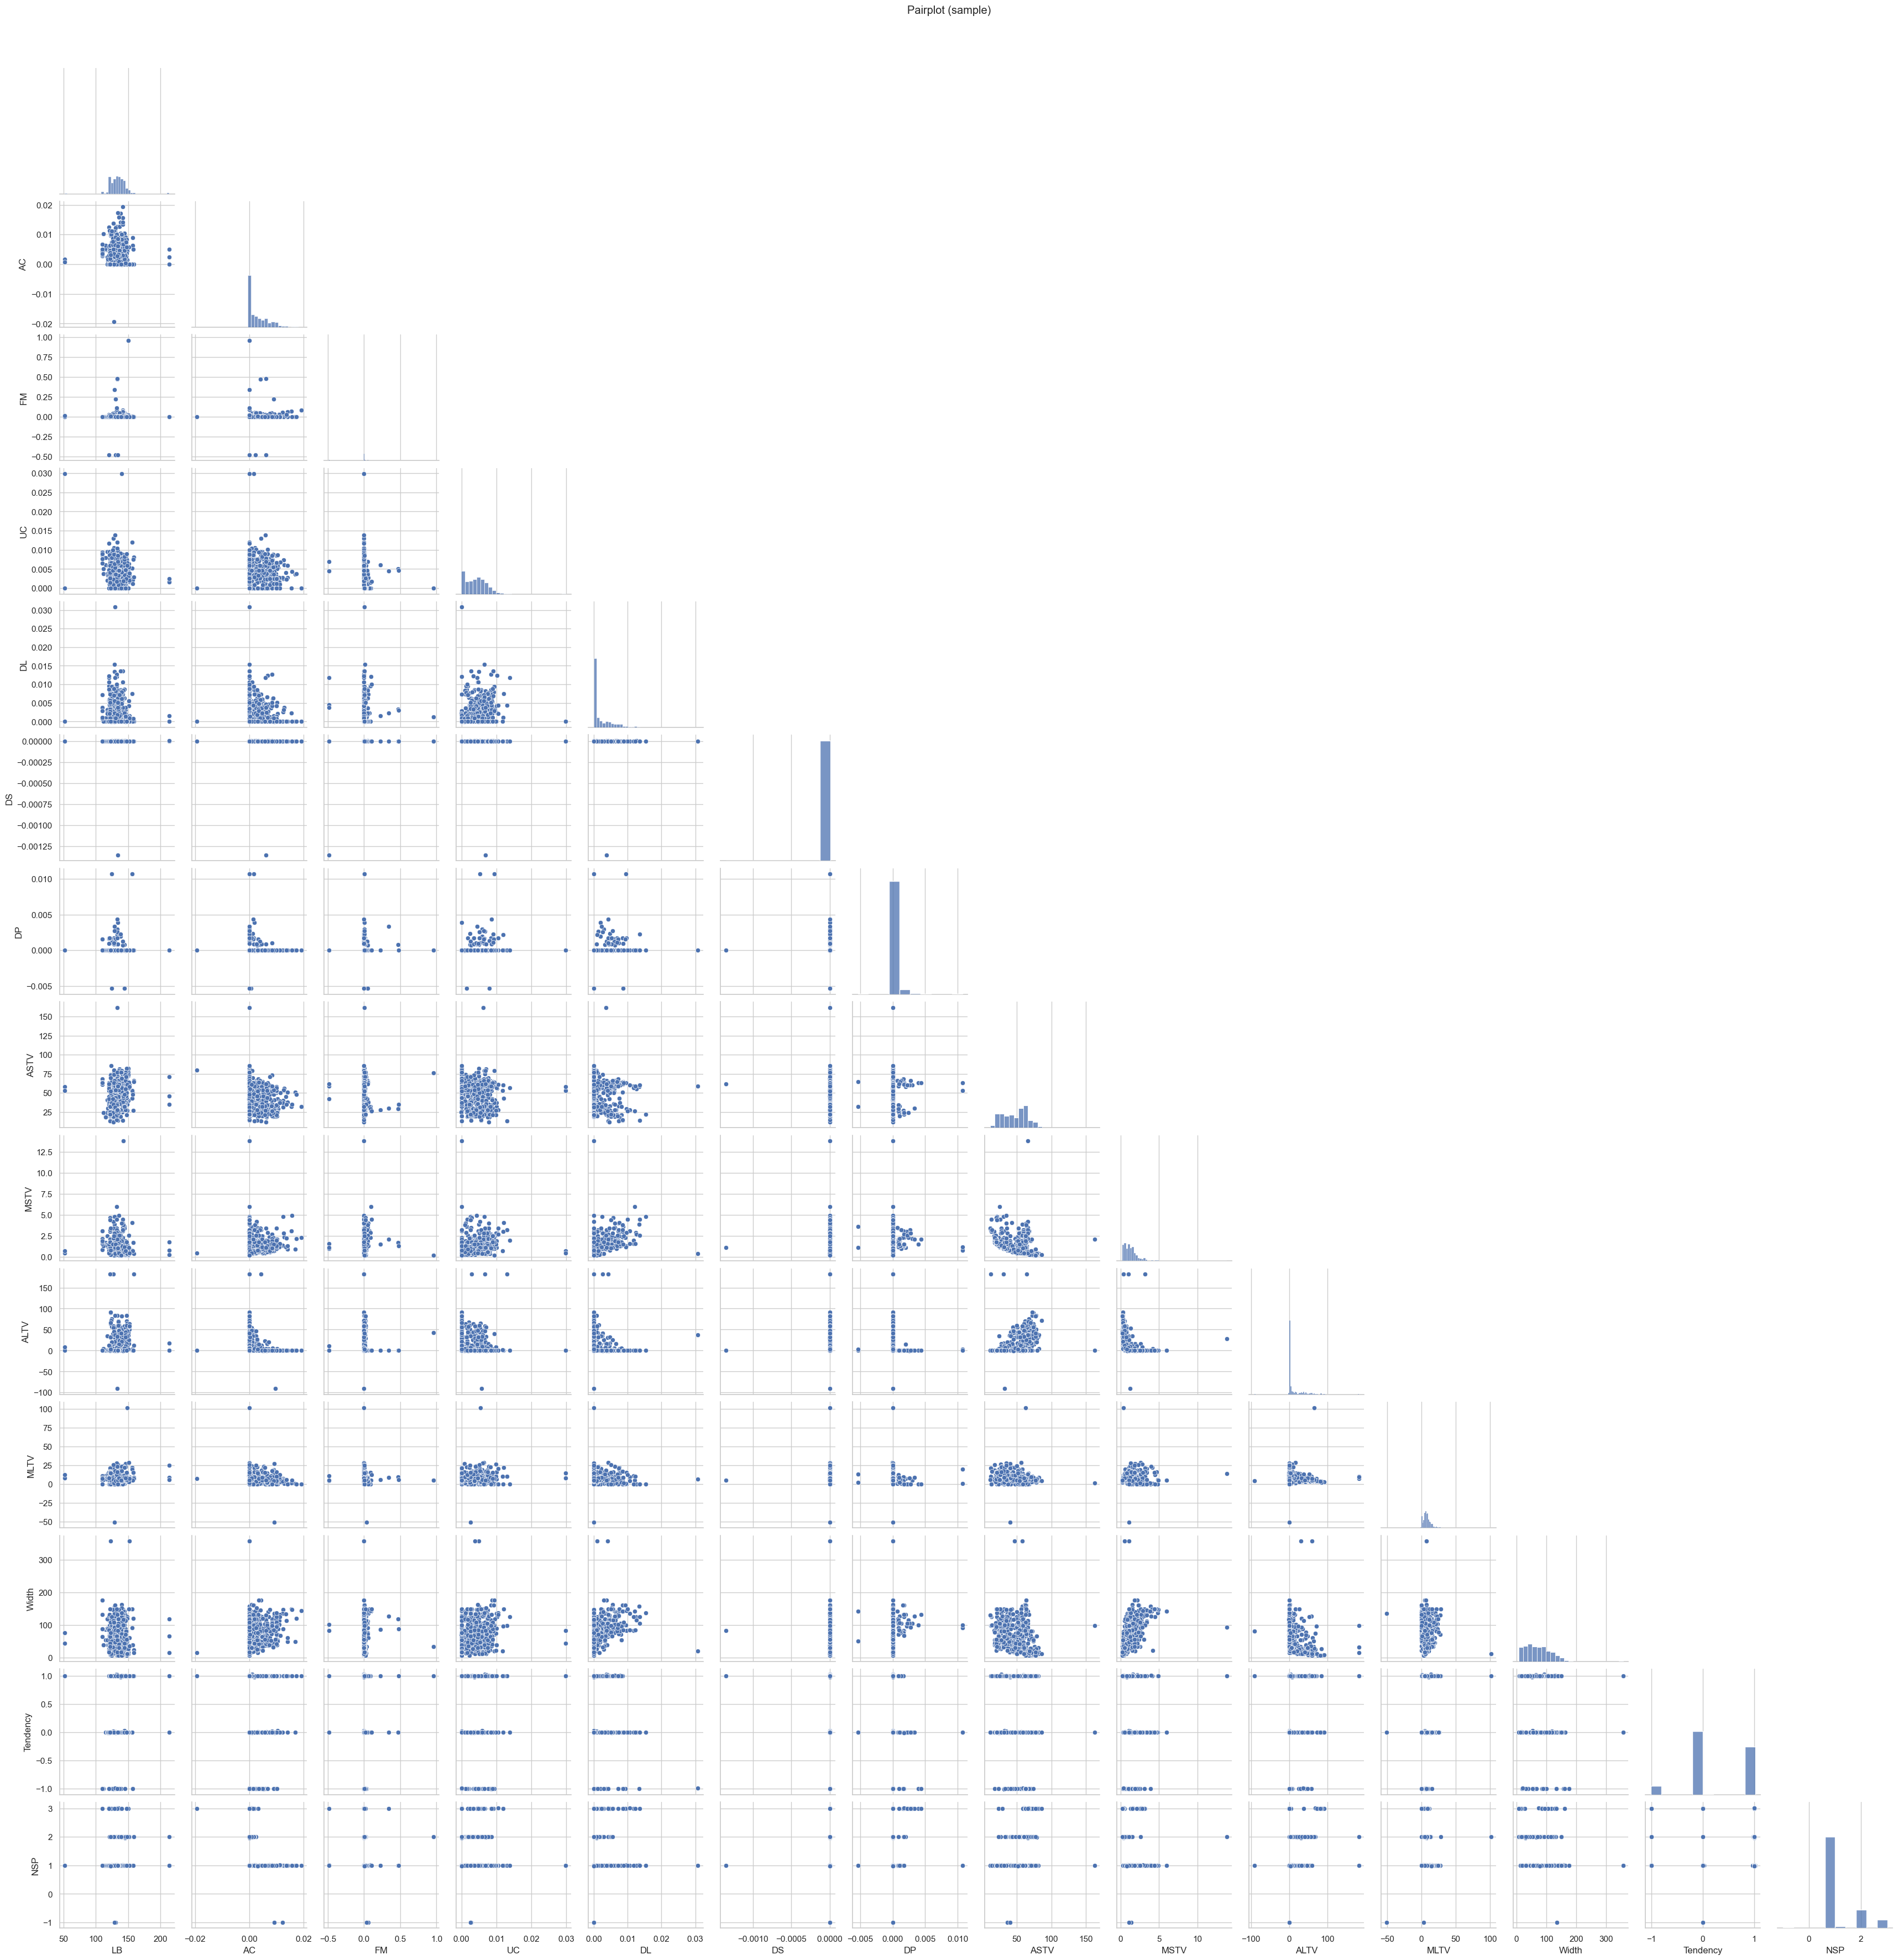

In [32]:

 # Visualizations  distributions
# Histograms and boxplots for each numeric variable

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df_imputed[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')

    sns.boxplot(x=df_imputed[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


# Violin plots to see distribution + median
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_imputed[num_cols], inner='quartile')
plt.title('Violin plots for numeric features')
plt.xticks(rotation=45)
plt.show()


# Pairplot (may be slow on many rows) - sample if large
sample = df_imputed.sample(n=500, random_state=42) if len(df_imputed) > 500 else df_imputed
sns.pairplot(sample[num_cols], corner=True)
plt.suptitle('Pairplot (sample)', y=1.02)
plt.show()


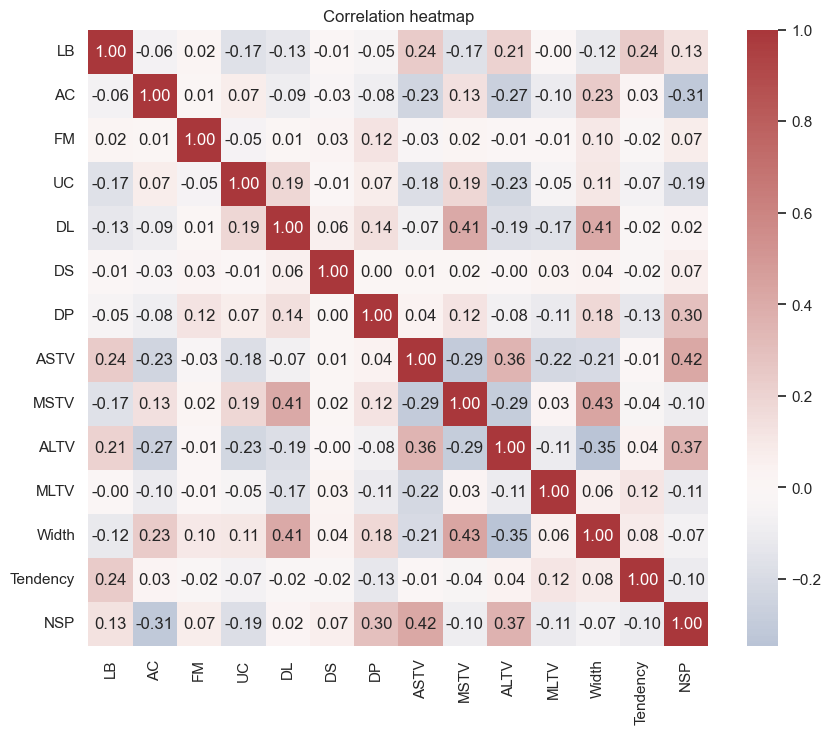


Top absolute correlations:
MSTV   Width    0.432822
NSP    ASTV     0.420873
MSTV   DL       0.410102
DL     Width    0.408578
ALTV   NSP      0.366454
       ASTV     0.357497
Width  ALTV     0.345732
NSP    AC       0.311689
       DP       0.295057
MSTV   ASTV     0.293882
dtype: float64


In [33]:
# 6. Correlation matrix (A correlation matrix is a table that shows the correlation coefficients between multiple numerical variables in a dataset)
corr = df_imputed[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Correlation heatmap') # A heatmap is a type of data visualization that uses color to represent numerical values in a matrix
plt.show()


# Top correlations (absolute)
corr_pairs = corr.abs().unstack().sort_values(kind='quicksort', ascending=False).drop_duplicates()
print('\nTop absolute correlations:')
print(corr_pairs[corr_pairs<1].head(10))

In [34]:
# 7. Outlier detection
# IQR method - flagging

outlier_flags = pd.DataFrame(index=df_imputed.index)
for  col in num_cols:

 Q1 = df_imputed[col].quantile(0.25)
 Q3 = df_imputed[col].quantile(0.75)
 IQR = Q3 - Q1
 lower = Q1 - 1.5 * IQR
 upper = Q3 + 1.5 * IQR
 outlier_flags[col+'_outlier'] = ~df_imputed[col].between(lower, upper)


# Count outliers per row
outlier_flags['outlier_count'] = outlier_flags.sum(axis=1)
print('\nRows with outliers (example):')
print(outlier_flags[outlier_flags['outlier_count']>0].head())
print('\nDistribution of outlier counts:')
print(outlier_flags['outlier_count'].value_counts().sort_index())


# Option: winsorize extreme values (example using percentiles)
winsorized = df_imputed.copy()
for col in num_cols:
 lower_p = df_imputed[col].quantile(0.01)
 upper_p = df_imputed[col].quantile(0.99)
 winsorized[col] = np.clip(df_imputed[col], lower_p, upper_p)


Rows with outliers (example):
   LB_outlier  AC_outlier  FM_outlier  UC_outlier  DL_outlier  DS_outlier  \
0       False       False       False       False       False       False   
3       False       False       False       False       False       False   
5       False       False       False       False        True       False   
6       False       False       False       False        True       False   
7       False       False       False       False       False       False   

   DP_outlier  ASTV_outlier  MSTV_outlier  ALTV_outlier  MLTV_outlier  \
0       False         False         False          True         False   
3       False         False         False         False          True   
5        True         False          True         False         False   
6        True         False          True         False         False   
7       False         False         False         False         False   

   Width_outlier  Tendency_outlier  NSP_outlier  outlier_count  
0 

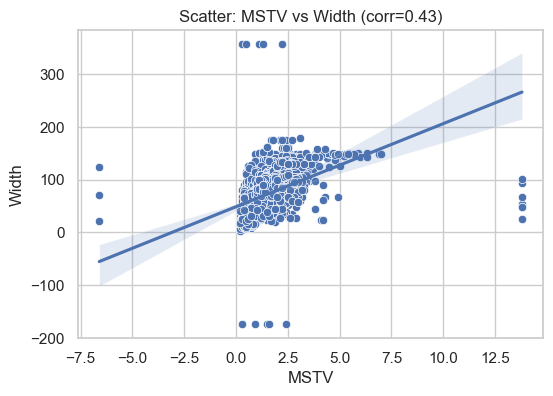

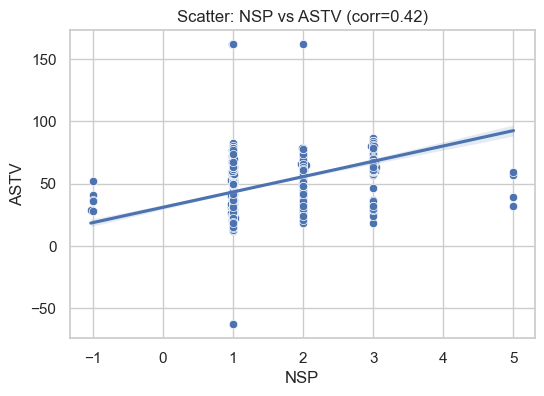

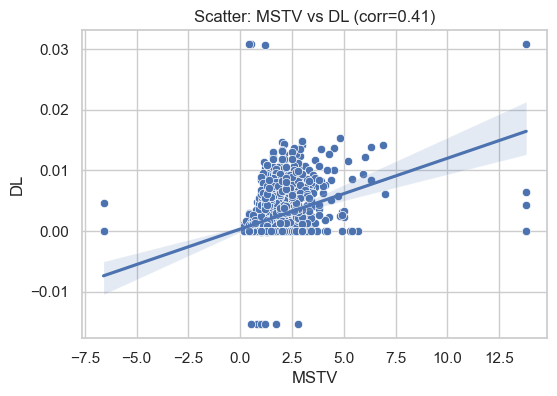

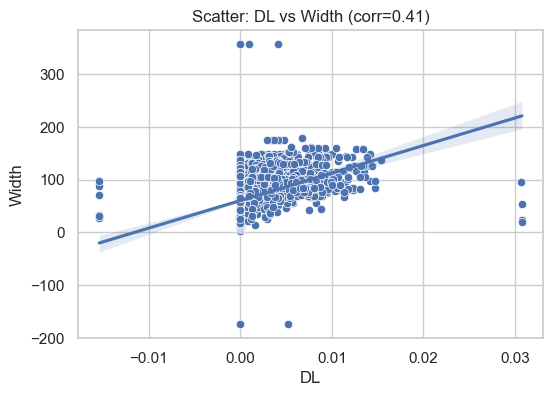

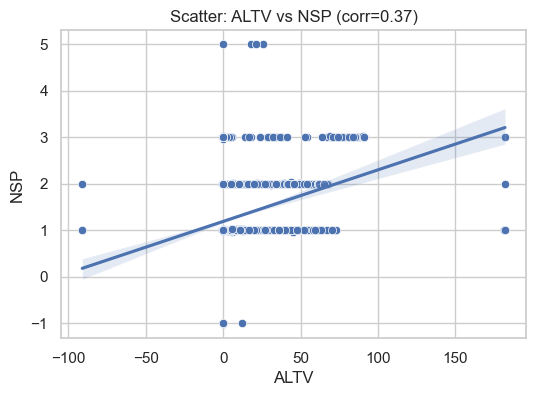

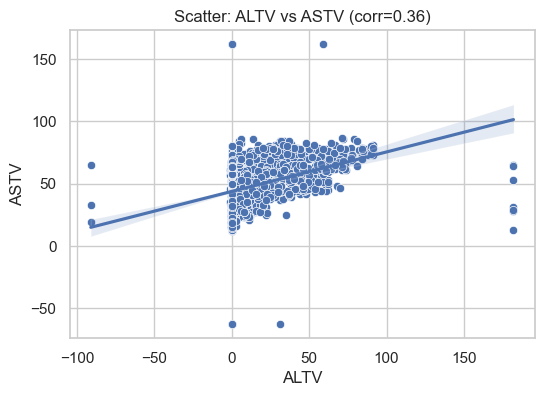

In [35]:
# Relationship exploration - scatterplots for interesting pairs

pairs = corr.abs().unstack().sort_values(ascending=False)
pairs = pairs[pairs<1].drop_duplicates().head(6)
for (a,b), val in pairs.items():
 plt.figure(figsize=(6,4))
 sns.scatterplot(x=df_imputed[a], y=df_imputed[b])
 sns.regplot(x=df_imputed[a], y=df_imputed[b], scatter=False, truncate=True)
 plt.title(f'Scatter: {a} vs {b} (corr={corr.loc[a,b]:.2f})')
 plt.show()

In [32]:
# PCA (Principal Component Analysis) to see major directions of variance . It helps simplify large datasets with many variables by transforming them into fewer new variable
pca = PCA(n_components=min(5, len(num_cols)))
scaled = (df_imputed[num_cols] - df_imputed[num_cols].mean()) / df_imputed[num_cols].std()
pca_res = pca.fit_transform(scaled.fillna(0))
explained = pca.explained_variance_ratio_
print('\nPCA explained variance ratio:\n', np.round(explained, 3))


PCA explained variance ratio:
 [0.195 0.128 0.091 0.081 0.078]


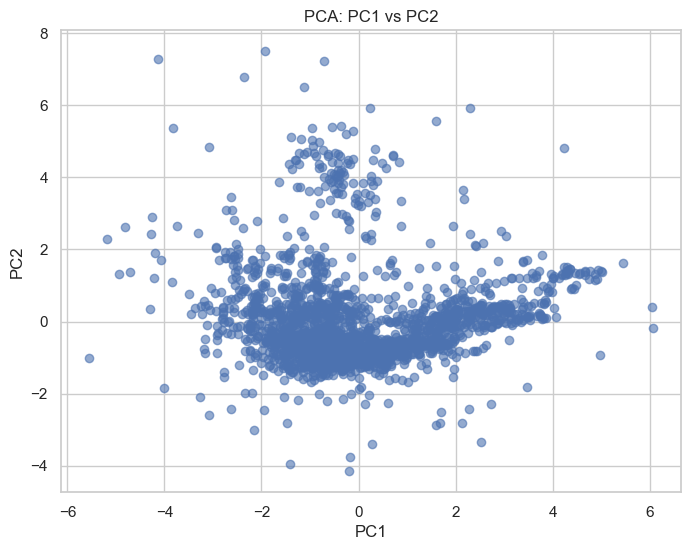

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(pca_res[:,0], pca_res[:,1], alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: PC1 vs PC2')
plt.show()

In [36]:

print('\n--- FINDINGS & CONCLUSIONS ---\n')
print('1) Missing values:')
print((df.isnull().sum()).sort_values(ascending=False))
print('\n2) Variables with high skewness:')
print(skew_kurt[skew_kurt['skewness'].abs()>1])
print('\n3) Strong correlations (abs corr > 0.6):')
strong = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()
strong = strong[(strong<1) & (strong>0.6)]
print(strong)





--- FINDINGS & CONCLUSIONS ---

1) Missing values:
LB          21
DS          21
MLTV        21
Width       21
Tendency    21
DP          21
NSP         21
AC          20
FM           0
UC           0
DL           0
ALTV         0
ASTV         0
MSTV         0
dtype: int64

2) Variables with high skewness:
      skewness    kurtosis
AC    2.032396   12.655518
FM    6.753070   94.472257
DL    2.010390   12.857926
DS    8.461304  229.115288
DP    6.456342   76.799456
MSTV  4.142518   44.034343
ALTV  2.981199   15.911891
MLTV  3.561739   56.516260
NSP   1.826906    3.753654

3) Strong correlations (abs corr > 0.6):
Series([], dtype: float64)


In [ ]:
# summary
 
# The descriptive statistics showed that most variables (e.g., LB, AC, FM, UC) had moderate dispersion and variability. Measures of central tendency 
# (mean and median) were close for many features, indicating relatively symmetrical distributions. # However, a few features showed noticeable skewness
 # suggesting the presence of non-normal patterns.

# The descriptive statistics showed that most variables (e.g., LB, AC, FM, UC) had moderate dispersion and variability. Measures of central tendency 
#(mean and median) were close for many features, indicating relatively symmetrical distributions. However, a few features showed noticeable skewness,
# suggesting the presence of non-normal patterns.

#The correlation matrix and heatmap revealed significant relationships between some features — for instance, strong correlations between ASTV, MSTV,
#ALTV, and MLTV suggest these variables jointly describe fetal heart rate variability. Such correlations indicate underlying physiological links in 
#how fetal heart rate responds to uterine contractions and movements.

# Histograms, boxplots, and violin plots indicated that while most variables followed near-normal distributions, certain features had long tails, 
# indicating potential physiological extremes or measurement anomalies.

# Observations such as higher accelerations (AC) being associated with healthier fetal states and prolonged decelerations (DP) aligning with distress
#indicators align with known medical interpretations of cardiotocographic data. These relationships can be explored further in predictive modeling or 
#classification tasks to detect fetal health conditions.

# Overall, the dataset is clean, well-structured, and suitable for further analysis or machine learning modeling. The EDA helped uncover meaningful 
# patterns, detect outliers, and understand inter-feature relationships that can aid in developing diagnostic models to assess fetal well-being and
# detect distress conditions early.

 

In [ ]:
 #  Implications for Decision-Making and Further Analysis

# These insights can help medical practitioners and researchers better understand fetal heart rate patterns and identify potential warning signs of distress.
# Strong correlations between variability measures can guide feature selection in predictive modeling, reducing redundancy in future machine learning models.

# The detection of outliers and skewed features highlights the need for data normalization or transformation before building classification models 
#(e.g., to predict normal vs. pathological fetal states).

#The cleaned and analyzed dataset is now well-suited for advanced modeling techniques, such as logistic regression, decision trees, or PCA, to develop
# predictive models for fetal health assessment.

In [ ]:
# Recommendations

# Conduct feature importance analysis using machine learning algorithms to identify which physiological parameters most strongly predict fetal distress.

# Perform PCA (Principal Component Analysis) to reduce dimensionality and visualize key patterns in fetal behavior.

# Validate findings with domain experts (medical professionals) to interpret relationships between variables in a clinical context